In [17]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


In [18]:
file_path = "/Users/cevikyi/Desktop/Attribition/data.csv"

In [19]:
# Manually parse the file
parsed_data = []

with open(file_path, 'r') as file:
    for line in file:
        # Remove the newline character and enclosing double quotes, then split by tab
        parsed_line = line.strip().strip('"').split('\t')
        parsed_data.append(parsed_line)

# Convert the parsed data into a DataFrame
columns = parsed_data[0]  # First line contains column names
parsed_df = pd.DataFrame(parsed_data[1:], columns=columns)


In [20]:
parsed_df.dtypes

CUSTOMERID              object
SESSIONID               object
TIMESTAMP_TOUCHPOINT    object
MARKETINGCHANNEL        object
REVENUE                 object
dtype: object

In [21]:
parsed_df.head()

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
0,955200d89b1a4cb0,f1017e8a41ed16a744786a7a74776d2f5c45fde8,2019-12-30 16:40:36,Direct_NON-BRAND,
1,e4067a9e62ec1936,d832ffe450a04918a5bddd80a9ec9fcb9a5e2815,2019-12-27 17:50:37,Direct_NON-BRAND,
2,8a48e8219b6c1a29,c1b01222e1c48f1e2dcb8cfa1026a3d72c52a522,2020-01-19 13:41:55,SEO_BRAND,
3,ef2206d490330882,b0130ba2203b0451a6686d2b1b7216f982a0b8a8,2019-12-15 10:32:40,SEO_BRAND,
4,b2dde47737c3b716,ac583684bfbe09bd16d73dd40ba584f38638ea1a,2020-01-10 23:52:27,Referral,


DATA CLEANING

In [22]:
# Data preprocessing steps
# Convert TIMESTAMP_TOUCHPOINT to datetime format
parsed_df['TIMESTAMP_TOUCHPOINT'] = pd.to_datetime(parsed_df['TIMESTAMP_TOUCHPOINT'], errors='coerce')

# Convert REVENUE to a numerical format, setting empty strings to NaN, then to zero
parsed_df['REVENUE'] = pd.to_numeric(parsed_df['REVENUE'], errors='coerce').fillna(0)

# Check for missing values and basic statistics
missing_values = parsed_df.isnull().sum()
basic_statistics = parsed_df.describe(include='all', datetime_is_numeric=True)

missing_values, basic_statistics

(CUSTOMERID                0
 SESSIONID                 0
 TIMESTAMP_TOUCHPOINT    145
 MARKETINGCHANNEL        145
 REVENUE                   0
 dtype: int64,
              CUSTOMERID SESSIONID           TIMESTAMP_TOUCHPOINT  \
 count             13304     13304                          13159   
 unique            10001     13161                            NaN   
 top     SEA_NON-BRAND""                                      NaN   
 freq                145       130                            NaN   
 mean                NaN       NaN  2019-12-24 00:13:31.979177728   
 min                 NaN       NaN            2019-11-20 12:24:50   
 25%                 NaN       NaN     2019-12-08 06:15:46.500000   
 50%                 NaN       NaN            2019-12-27 18:59:05   
 75%                 NaN       NaN     2020-01-06 15:37:39.500000   
 max                 NaN       NaN            2020-01-22 23:55:12   
 std                 NaN       NaN                            NaN   
 
         M

In [23]:
#remove NA values
cleaned_df = parsed_df.dropna(subset=['TIMESTAMP_TOUCHPOINT', 'MARKETINGCHANNEL'])

In [24]:
cleaned_df.describe(include='all', datetime_is_numeric=True)

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE
count,13159,13159,13159,13159,13159.000000
unique,10000,13159,NaN,7,NaN
top,ae397ecdeb9f9327,f1017e8a41ed16a744786a7a74776d2f5c45fde8,NaN,Direct_NON-BRAND,NaN
freq,38,1,NaN,5261,NaN
mean,NaN,NaN,2019-12-24 00:13:31.979177728,NaN,86.784710
min,NaN,NaN,2019-11-20 12:24:50,NaN,0.000000
25%,NaN,NaN,2019-12-08 06:15:46.500000,NaN,0.000000
50%,NaN,NaN,2019-12-27 18:59:05,NaN,0.000000
75%,NaN,NaN,2020-01-06 15:37:39.500000,NaN,0.000000
max,NaN,NaN,2020-01-22 23:55:12,NaN,1000.000000


* There are 13159 rows in the processed dataset, where each record is a unique session.
* Revenue takes 2 values, 0 or 1000. This gives me the impression that this client might be a SaaS business


Understand Data
1. How many customers generated revenue? Are there any customers that generated revenue more than once?
2. How many much time it takes to make the purchase after the first visit?
3. How many touches it takes to generate sales?

In [25]:
#1. How many customers generated revenue? Are there any customers that generated revenue more than once?

customers_with_more_than_one_revenue = len(cleaned_df[cleaned_df["REVENUE"] > 0].groupby("CUSTOMERID")["REVENUE"].count().loc[lambda x: x > 1].sort_values(ascending=False))
# Calculate the total number of unique customers
total_customers = cleaned_df["CUSTOMERID"].nunique()

# Calculate the number of unique customers who generated revenue
customers_with_revenue = cleaned_df[cleaned_df["REVENUE"] > 0]["CUSTOMERID"].nunique()
total_orders = cleaned_df[cleaned_df["REVENUE"]>0]["CUSTOMERID"].count()


# Calculate the percentage of customers who generated revenue
percentage_customers_with_revenue = (customers_with_revenue / total_customers) * 100

# Print the result
print(f"Total transactions: {total_orders}")
print(f"Total customers: {total_customers}")
print(f"Unique customers with orders: {customers_with_revenue}")
print(f"Percentage of customers who generated revenue: {percentage_customers_with_revenue}%")
print(f"Customers with more than one revenue: {customers_with_more_than_one_revenue}")

Total transactions: 1142
Total customers: 10000
Unique customers with orders: 1085
Percentage of customers who generated revenue: 10.85%
Customers with more than one revenue: 45


In [26]:
# Calculate the total number of unique customers
total_customers = cleaned_df["CUSTOMERID"].nunique()

# Calculate the number of unique customers who generated revenue
customers_with_revenue = cleaned_df[cleaned_df["REVENUE"] > 0]["CUSTOMERID"].nunique()

# Calculate the percentage of customers who generated revenue
percentage_customers_with_revenue = (customers_with_revenue / total_customers) * 100

# Print the result
print(f"Percentage of customers who generated revenue: {percentage_customers_with_revenue}%")


Percentage of customers who generated revenue: 10.85%


In [27]:
#2. How many much time it takes to make the purchase after the first visit?
#3. How many touches it takes to generate sales?

# Function to calculate the above questions
def calculate_time_diff(df):
    # Filter the DataFrame to get the first touchpoint and the touchpoints with revenue
    df = df.sort_values(by=['CUSTOMERID', 'TIMESTAMP_TOUCHPOINT'])
    # Filter out customers who never made a purchase
    if df['REVENUE'].max() <= 0:
        return None

    # Identify the timestamp of the first revenue event
    first_revenue_time = df[df['REVENUE'] > 0]['TIMESTAMP_TOUCHPOINT'].min()

    # Keep only the records up to and including the first revenue event
    df = df[df['TIMESTAMP_TOUCHPOINT'] <= first_revenue_time]

    # Get the first touchpoint
    first_touch = df.iloc[0]

    # If there's a revenue event, calculate the time difference
    time_to_purchase = first_revenue_time - first_touch['TIMESTAMP_TOUCHPOINT']
    total_touch = df["MARKETINGCHANNEL"].count()

    return pd.Series({'time_to_purchase_hours': np.round(time_to_purchase.total_seconds() / 3600, decimals=2),
                      'total_touch': total_touch})

In [28]:
converted_customers = cleaned_df.groupby('CUSTOMERID').apply(calculate_time_diff).dropna().reset_index()
print(converted_customers.total_touch.value_counts(normalize=True))
print(converted_customers.time_to_purchase_hours.value_counts(normalize=True))

1.0     0.793548
2.0     0.123502
3.0     0.032258
4.0     0.016590
5.0     0.008295
7.0     0.007373
6.0     0.005530
8.0     0.004608
9.0     0.002765
10.0    0.001843
14.0    0.000922
16.0    0.000922
11.0    0.000922
15.0    0.000922
Name: total_touch, dtype: float64
0.00      0.793548
1.63      0.001843
1.82      0.001843
869.14    0.000922
48.03     0.000922
            ...   
55.16     0.000922
28.39     0.000922
1.50      0.000922
166.41    0.000922
1.67      0.000922
Name: time_to_purchase_hours, Length: 223, dtype: float64


In [29]:
print(cleaned_df.MARKETINGCHANNEL.nunique())

7


/var/folders/rt/jz00jm2d097123_c6z4pg_dc0000gn/T/ipykernel_96574/2530162773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['DATE'] = cleaned_df['TIMESTAMP_TOUCHPOINT'].dt.date


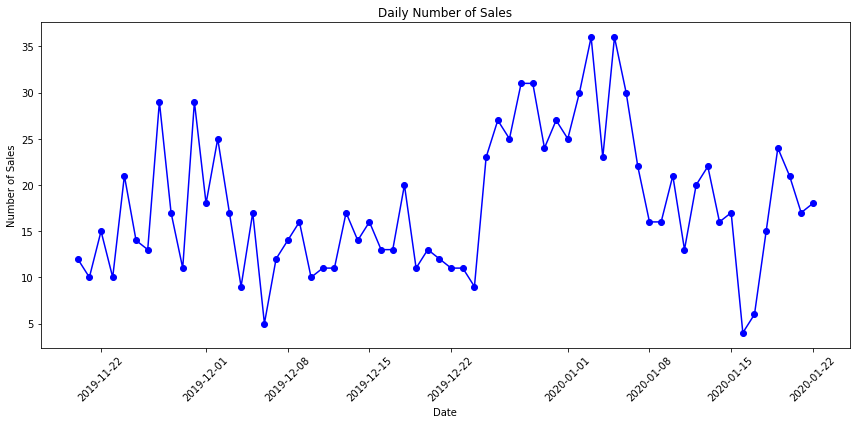

In [30]:
# Convert TIMESTAMP_TOUCHPOINT to just date (no time)
cleaned_df['DATE'] = cleaned_df['TIMESTAMP_TOUCHPOINT'].dt.date

# Filter the DataFrame for revenue events and group by date
daily_sales = cleaned_df[cleaned_df['REVENUE'] > 0].groupby('DATE').size()

# Create a time series plot of daily sales
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='b', marker='o')
plt.title('Daily Number of Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary and assumptions: 
* ~ 80% of our revenue-generating customers only had one interaction with us.
* 10.85% of customers generated revenue. A very small fraction of customers have more than 1 revenue.
* There are 7 Marketing Channels in the dataset
* I'll focus on the first purchase for revenue attribition model, removing post-revenue data and normalizing for customers with multiple purchases.
* For now, I'm assuming that the first visit to sales time is within accepted observation window and will not modify it

In [31]:
def filter_post_revenue_records(group):
    # If there's no revenue, return the group as is
    if group['REVENUE'].max() <= 0:
        return group

    # Find the first instance where revenue is realized
    first_revenue_time = group[group['REVENUE'] > 0]['TIMESTAMP_TOUCHPOINT'].min()

    # Filter out records that occur after the first revenue event
    return group[group['TIMESTAMP_TOUCHPOINT'] <= first_revenue_time]

# Apply the function to each customer group
filtered_df = cleaned_df.groupby('CUSTOMERID').apply(filter_post_revenue_records).reset_index(drop=True)

In [32]:
filtered_df

,CUSTOMERID,SESSIONID,TIMESTAMP_TOUCHPOINT,MARKETINGCHANNEL,REVENUE,DATE
0,0002759882f3724f,2df59a3cd2cdf7d06694fc56ba6ec798a1c835b9,2020-01-05 19:54:24,Direct_NON-BRAND,0.0,2020-01-05
1,000af8f6d9aef9f3,209638bd0565f1ca365b0816e26805d787b51bb5,2019-12-29 12:56:18,Direct_NON-BRAND,0.0,2019-12-29
2,000e2b58b4e3a1de,1318dd3140df3d391d1d6c525f0abe78219b667f,2020-01-06 15:24:35,Referral,0.0,2020-01-06
3,000effa1cf4ea117,93571e674f7b66bfaf21bc5d0fdc9ae427ea2318,2019-12-26 11:18:18,SEO_BRAND,0.0,2019-12-26
4,001513f39ca7448a,94ddc2fd1e6c93c431852783115987e6ca4d85b2,2020-01-05 15:17:46,Direct_NON-BRAND,0.0,2020-01-05
...,...,...,...,...,...,...
12540,ffd92a1bee90652c,d1664b86878bb91531cb38c62298fd5aa5f44581,2019-11-23 22:26:14,SEO_BRAND,0.0,2019-11-23
12541,ffd92a1bee90652c,528cd6bc0440de0bee8cf24f81741aedf4583e62,2019-11-24 12:04:53,SEO_BRAND,0.0,2019-11-24
12542,ffe3d2b4ffa544a0,e46d277a01168a2e18c7ba4cd8dba014e6be8360,2019-12-27 20:09:21,Direct_NON-BRAND,0.0,2019-12-27
12543,ffe8ca2b9414bfe6,1294b5d8763cc4932c99938cd1d6cd17f3fbfa6e,2019-12-06 19:29:45,SEO_BRAND,1000.0,2019-12-06


In [33]:
def last_touch_attribution(dataframe):
    """
    Calculate revenue attribution based on a modified Last-Touch model.

    :param dataframe: DataFrame containing the customer journey data.
    :return: DataFrame with attributed revenue per marketing channel.
    """
    # Sorting the data by CUSTOMERID and TIMESTAMP_TOUCHPOINT
    sorted_df = dataframe.sort_values(by=['CUSTOMERID', 'TIMESTAMP_TOUCHPOINT'])

    # Grouping the data by CUSTOMERID
    grouped_df = sorted_df.groupby('CUSTOMERID')

    # Initializing a dictionary to store the revenue attributed to each channel
    channel_revenue = defaultdict(float)

    for _, group in grouped_df:
        # Getting the total revenue for the customer
        total_revenue = group['REVENUE'].sum()
        # Getting the last marketing channel for the customer
        last_touchpoint_channel = group.iloc[-1]['MARKETINGCHANNEL']
        # Assigning the total revenue of the customer to this channel
        channel_revenue[last_touchpoint_channel] += total_revenue

    # Converting the dictionary to a DataFrame for visualization
    attributed_revenue_df = pd.DataFrame(list(channel_revenue.items()), columns=['Channel', 'LT Attributed Revenue'])
     # Calculating the total revenue across all channels
    total_revenue_all_channels = attributed_revenue_df['LT Attributed Revenue'].sum()

    # Calculating the percentage of revenue per channel
    attributed_revenue_df['LT Percentage of Revenue (%)'] = (attributed_revenue_df['LT Attributed Revenue'] / total_revenue_all_channels) * 100

    return attributed_revenue_df.sort_values(by='LT Percentage of Revenue (%)', ascending=False)




def linear_attribution(dataframe):
    """
    Calculate revenue attribution based on the Linear model.

    :param dataframe: DataFrame containing the customer journey data.
    :return: DataFrame with attributed revenue per marketing channel.
    """
    # Grouping the data by customer and session
    grouped_df = dataframe.sort_values(by=['CUSTOMERID', 'SESSIONID', 'TIMESTAMP_TOUCHPOINT']).groupby(['CUSTOMERID'])
    channel_revenue = defaultdict(float)

    for _, group in grouped_df:
        total_revenue = group['REVENUE'].max()  # Revenue is only at the last touchpoint
        touchpoints = group['MARKETINGCHANNEL'].nunique() #Get unique channels

        # Distributing the revenue equally among all unique touchpoints
        if touchpoints > 0:
            revenue_per_touchpoint = total_revenue / touchpoints
            for channel in group['MARKETINGCHANNEL'].unique():
                channel_revenue[channel] += revenue_per_touchpoint

    # Converting the dictionary to a DataFrame for better visualization
    attributed_revenue_df = pd.DataFrame(list(channel_revenue.items()), columns=['Channel', 'LA Attributed Revenue'])
    # Calculating the total revenue across all channels
    total_revenue_all_channels = attributed_revenue_df['LA Attributed Revenue'].sum()

    # Calculating the percentage of revenue per channel
    attributed_revenue_df['LA Percentage of Revenue (%)'] = (attributed_revenue_df['LA Attributed Revenue'] / total_revenue_all_channels) * 100

    return attributed_revenue_df.sort_values(by='LA Percentage of Revenue (%)', ascending=False)


def time_decay_attribution(dataframe, decay_factor=0.5):
    """
    Calculate revenue attribution based on the Time-Decay model.

    :param dataframe: DataFrame containing the customer journey data.
    :param decay_factor: Decay factor for attribution (0 < decay_factor < 1).
    :return: DataFrame with attributed revenue per marketing channel.
    """
    # Grouping the data by customer and session
    grouped_df = dataframe.sort_values(by=['CUSTOMERID', 'SESSIONID', 'TIMESTAMP_TOUCHPOINT']).groupby(['CUSTOMERID'])
    channel_revenue = defaultdict(float)

    for _, group in grouped_df:
        # Revenue and number of touchpoints
        total_revenue = group['REVENUE'].max()
        num_touchpoints = len(group)

        # Weight for each touchpoint (higher for recent touchpoints)
        weights = [decay_factor ** i for i in range(num_touchpoints - 1, -1, -1)]
        total_weight = sum(weights)

        # Attribution of revenue to channels
        for touchpoint, weight in zip(group.iterrows(), weights):
            channel = touchpoint[1]['MARKETINGCHANNEL']
            channel_revenue[channel] += (weight / total_weight) * total_revenue

    # Converting to DataFrame for better visualization
    attributed_revenue_df = pd.DataFrame(list(channel_revenue.items()), columns=['Channel', 'TD Attributed Revenue'])
    total_revenue_all_channels = attributed_revenue_df['TD Attributed Revenue'].sum()
    attributed_revenue_df['TD Percentage of Revenue (%)'] = (attributed_revenue_df['TD Attributed Revenue'] / total_revenue_all_channels) * 100

    return attributed_revenue_df.sort_values(by='TD Percentage of Revenue (%)', ascending=False)


In [34]:
last_touch_summary = last_touch_attribution(filtered_df)
linear_summary = linear_attribution(filtered_df)
time_decay_summary = time_decay_attribution(filtered_df)

In [36]:
df1 = pd.merge(last_touch_summary,linear_summary)
df_summary = pd.merge(df1,time_decay_summary)
df_summary

,Channel,LT Attributed Revenue,LT Percentage of Revenue (%),LA Attributed Revenue,LA Percentage of Revenue (%),TD Attributed Revenue,TD Percentage of Revenue (%)
0,Direct_NON-BRAND,419000.0,38.617512,415083.333333,38.256528,411793.809536,37.953347
1,SEO_BRAND,351000.0,32.350230,359750.000000,33.156682,362556.500975,33.415346
2,Referral,182000.0,16.774194,177916.666667,16.397849,178477.316631,16.449522
3,SEO_NON-BRAND,131000.0,12.073733,129916.666667,11.973886,129235.678898,11.911122
4,Referral_NON-BRAND,1000.0,0.092166,1000.000000,0.092166,1000.000000,0.092166
5,Social Media organic_NON-BRAND,1000.0,0.092166,500.000000,0.046083,666.666667,0.061444
6,"""""Adwords/",0.0,0.000000,833.333333,0.076805,1270.027293,0.117053
